In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df

Saving matches.csv to matches (1).csv


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [0]:
# This dictionary is used in Q3 and Q5.
changer = {'MI':'Mumbai Indians',
           'CSK': 'Chennai Super Kings',
           'KKR':'Kolkata Knight Riders',
           'RCB':'Royal Challengers Bangalore',
           'KXIP':'Kings XI Punjab',
           'RR':'Rajasthan Royals',
           'DD':'Delhi Daredevils',
           'SRH':'Sunrisers Hyderabad',
           'DC':'Deccan Chargers',
           'GL':'Gujarat Lions',
           'PW':'Pune Warriors',
           'RPS':'Rising Pune Supergiant',
           'KTK':'Kochi Tuskers Kerala'          
          }

In [0]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
df[(df['season']>=2010) & (df['season']<=2015) & (df['city']=='Mumbai')]['player_of_match'].value_counts().head(1)

KA Pollard    6
Name: player_of_match, dtype: int64

In [0]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
df[df['win_by_runs']>50]['winner'].value_counts().head(1)

Chennai Super Kings    11
Name: winner, dtype: int64

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]
def compare_wins(team1,team2):
  team1 = changer[team1.upper()]
  team2 = changer[team2.upper()]
  DF = df[['team1','team2','winner']]
  mask = ((DF['team1']==team1)|(DF['team2']==team1)) & ((DF['team1']==team2)|(DF['team2']==team2))
  lin = DF[mask].shape
  print(f'There was {lin[0]} matches played between these two teams.\n')
  print('No. of times each team won is given below :- \n')
  print(DF[mask]['winner'].value_counts())


print('Enter the name of the teams in SHORT FORM!!')
team1 = input('team 1 : ')
team2 = input('Team 2 : ')
compare_wins(team1,team2)

Enter the name of the teams in SHORT FORM!!
team 1 : csk
Team 2 : kkr
There was 16 matches played between these two teams.

No. of times each team won is given below :- 

Chennai Super Kings      10
Kolkata Knight Riders     6
Name: winner, dtype: int64


In [0]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]

<BarContainer object of 11 artists>

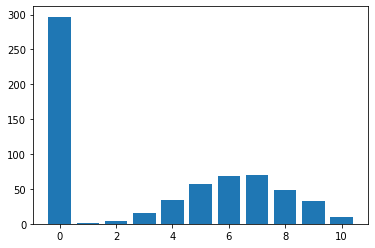

In [0]:
y = df['win_by_wickets'].value_counts().sort_values()
plt.bar(y.index,y.values)

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 

In [0]:
def checker(team):
  try:
    team = changer[team.upper()]
    masking = ((df['team1']==team)|(df['team2']==team))&(df['toss_winner']==team)
    total = df[masking]['toss_winner'].value_counts().sum()
    win = df[masking]['winner'].value_counts()[0]
    prcntg = (win/total)*100
    print(f'win percentage of {team} is {prcntg}')
  except:
    print('Incorrect short form.')

In [0]:
print('Please enter the name of the team in SHORT FORM!!')
team = input('Team name : ')
checker(team)

Please enter the name of the team in SHORT FORM!!
Team name : kkr
win percentage of Kolkata Knight Riders is 56.41025641025641
